# **Multi-Layer Perceptron For Regression**



# 1 SKLEARN

## **1.1 IMPORT LIBRARY**

Pengolahan Data

In [ ]:
import pandas as pd
import numpy as np

Training Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

Visualisasi Hasil Model

In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.inspection import PartialDependenceDisplay
import mpl_toolkits.mplot3d
from sklearn.inspection import partial_dependence
from time import time

Dataset

In [ ]:
from sklearn.datasets import fetch_california_housing

## **1.2 DATA UNDERSTANDING**

### **1.2.1 IMPORT DATA**

In [ ]:
cal_housing = fetch_california_housing()

### **1.2.2 DATA DESCRIPTION**

In [ ]:
print(cal_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
cal_housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

## **1.3 SPLITING DATA**

In [ ]:
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
Y = cal_housing.target

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

y -= y.mean()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## **1.4 IMPLEMENTATION MLP**

In [ ]:
tic = time()
estimated = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(
        hidden_layer_sizes=(30, 15),
        learning_rate_init=0.01,
        early_stopping=True,
        random_state=0
    ),
)

estimated.fit(X_train, y_train)
print(f'Selesai di Waktu {time() - tic:.3f}s')
print(f'Hasil Testing scorenya adalah {estimated.score(X_test, y_test):.2f}')

Selesai di Waktu 5.647s
Hasil Testing scorenya adalah 0.82


## **1.5 EVALUATE MODEL**

### **1.5.1 Plotting Hasil Regresi**

In [ ]:
parameter = {
    "subsample": 50,
    "n_jobs" : 2,
    "grid_resolution" : 20,
    "centered" : True,
    "random_state" : 0
}

In [ ]:
cal_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Selesai Di waktu 21.283s


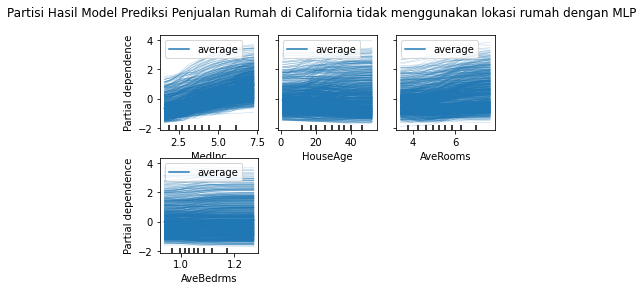

In [ ]:
tic = time()
display = PartialDependenceDisplay.from_estimator(
    estimated,
    X_train,
    features=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms'],
    kind = "both"
)
print(f'Selesai Di waktu {time() - tic:.3f}s')
display.figure_.suptitle(
    "Partisi Hasil Model Prediksi Penjualan Rumah di California " +
    "tidak menggunakan lokasi rumah dengan MLP"
)
display.figure_.subplots_adjust(hspace=0.3)

In [ ]:
tic = time()
estimated = HistGradientBoostingRegressor(random_state=0)
estimated.fit(X_train, y_train)
print(f'Selesai di waktu {time() - tic:.3f}s')
print(f'Hasil Model : {estimated.score(X_test, y_test):.2f}')

Selesai di waktu 1.360s
Hasil Model : 0.85


Selesai Di waktu 50.146s


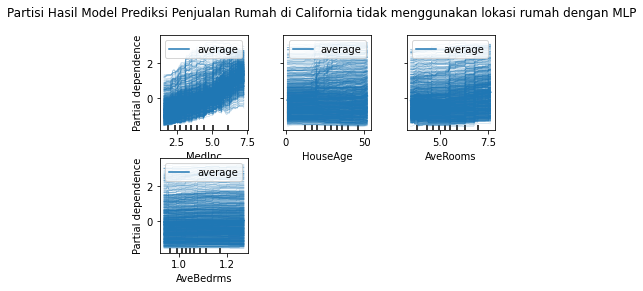

In [ ]:
tic = time()
display = PartialDependenceDisplay.from_estimator(
    estimated,
    X_train,
    features=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms'],
    kind = "both"
)
print(f'Selesai Di waktu {time() - tic:.3f}s')
display.figure_.suptitle(
    "Partisi Hasil Model Prediksi Penjualan Rumah di California " +
    "tidak menggunakan lokasi rumah dengan MLP"
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)